In [5]:
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv(r'C:\Users\pnaik27\ML_2021\Logistic_regression\diabetes.csv')
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


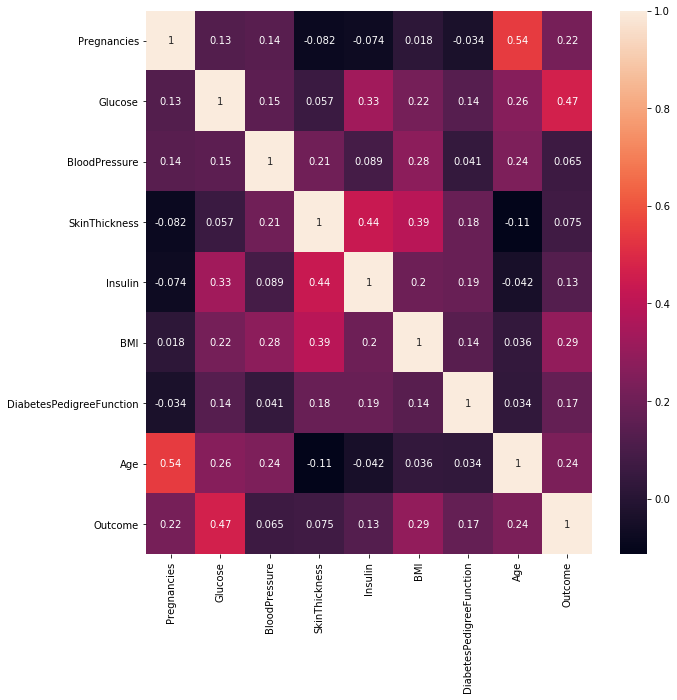

In [6]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True)

In [8]:
df[df['Glucose']==0]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
75,1,0,48,20,0,24.7,0.140,22,0
182,1,0,74,20,23,27.7,0.299,21,0
342,1,0,68,35,0,32.0,0.389,22,0
349,5,0,80,32,0,41.0,0.346,37,1
502,6,0,68,41,0,39.0,0.727,41,1


In [9]:
df['Glucose']=df['Glucose'].replace(0,df['Glucose'].mean())

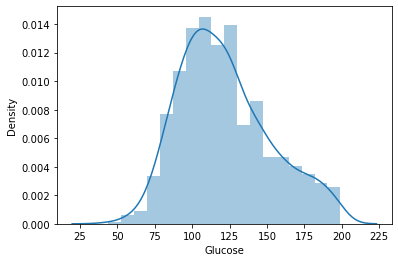

In [14]:
sns.distplot(df['Glucose'])

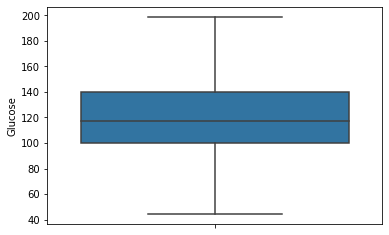

In [48]:
sns.boxplot(y='Glucose',data=df)

In [20]:
data=df[['Glucose','Outcome']]

In [21]:
from sklearn.preprocessing import StandardScaler 
from sklearn.linear_model  import Ridge,Lasso,RidgeCV, LassoCV, ElasticNet, ElasticNetCV, LogisticRegression
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor 
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score

In [43]:
y=data['Outcome']
x=data.iloc[:,:1]

In [44]:
x

,Glucose
0,148.0
1,85.0
2,183.0
3,89.0
4,137.0
...,...
763,101.0
764,122.0
765,121.0
766,126.0


In [45]:
scalar=StandardScaler()
x_scaled=scalar.fit_transform(x)

In [46]:
x_scaled

array([[ 0.86527574],
       [-1.20598931],
       [ 2.01597855],
       [-1.07448042],
       [ 0.50362629],
       [-0.1867954 ],
       [-1.43612988],
       [-0.21967262],
       [ 2.47625968],
       [ 0.10909961],
       [-0.38405874],
       [ 1.52282021],
       [ 0.56938074],
       [ 2.21324189],
       [ 1.45706576],
       [-0.71283097],
       [-0.12104095],
       [-0.4826904 ],
       [-0.6141993 ],
       [-0.21967262],
       [ 0.14197684],
       [-0.74570819],
       [ 2.44338246],
       [-0.08816373],
       [ 0.70088963],
       [ 0.10909961],
       [ 0.83239852],
       [-0.81146264],
       [ 0.76664408],
       [-0.15391817],
       [-0.41693596],
       [ 1.19404798],
       [-1.10735764],
       [-0.97584875],
       [ 0.01046794],
       [-0.6141993 ],
       [ 0.53650351],
       [-0.64707652],
       [-1.0416032 ],
       [-0.35118151],
       [ 1.91734689],
       [ 0.3721174 ],
       [-0.51556763],
       [ 1.62145188],
       [ 1.2269252 ],
       [ 1

In [49]:
x_train,x_test,y_train,y_test = train_test_split(x_scaled,y, test_size= 0.25, random_state = 42)

In [50]:
log_reg = LogisticRegression()
log_reg.fit(x_train,y_train)

LogisticRegression()

In [51]:
y_pred = log_reg.predict(x_test)

In [52]:
accuracy = accuracy_score(y_test,y_pred)
accuracy

0.7083333333333334

In [53]:
conf_mat = confusion_matrix(y_test,y_pred)
conf_mat

array([[102,  21],
       [ 35,  34]], dtype=int64)

In [54]:
true_positive = conf_mat[0][0]
false_positive = conf_mat[0][1]
false_negative = conf_mat[1][0]
true_negative = conf_mat[1][1]

In [56]:
Accuracy = (true_positive + true_negative) / (true_positive +false_positive + false_negative + true_negative)
print("Accuracy-",Accuracy)
Precision = true_positive/(true_positive+false_positive)
print("Precision-",Precision)
Recall = true_positive/(true_positive+false_negative)
print("Recall-",Recall)
F1_Score = 2*(Recall * Precision) / (Recall + Precision)
print("F1_Score-",F1_Score)
auc = roc_auc_score(y_test, y_pred)
print("AUC-",auc)

Accuracy- 0.7083333333333334
Precision- 0.8292682926829268
Recall- 0.7445255474452555
F1_Score- 0.7846153846153845
AUC- 0.6610109579356663
